In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
import warnings
from sklearn.dummy import DummyClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
import shap
shap.initjs()
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [2]:
zip_file_path = 'data.zip'
csv_file_inside_zip = 'data.csv'

In [3]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [4]:
warnings.filterwarnings("ignore")

In [5]:
drops = ["Mode"]
X = df.drop(drops, axis=1)

<Axes: >

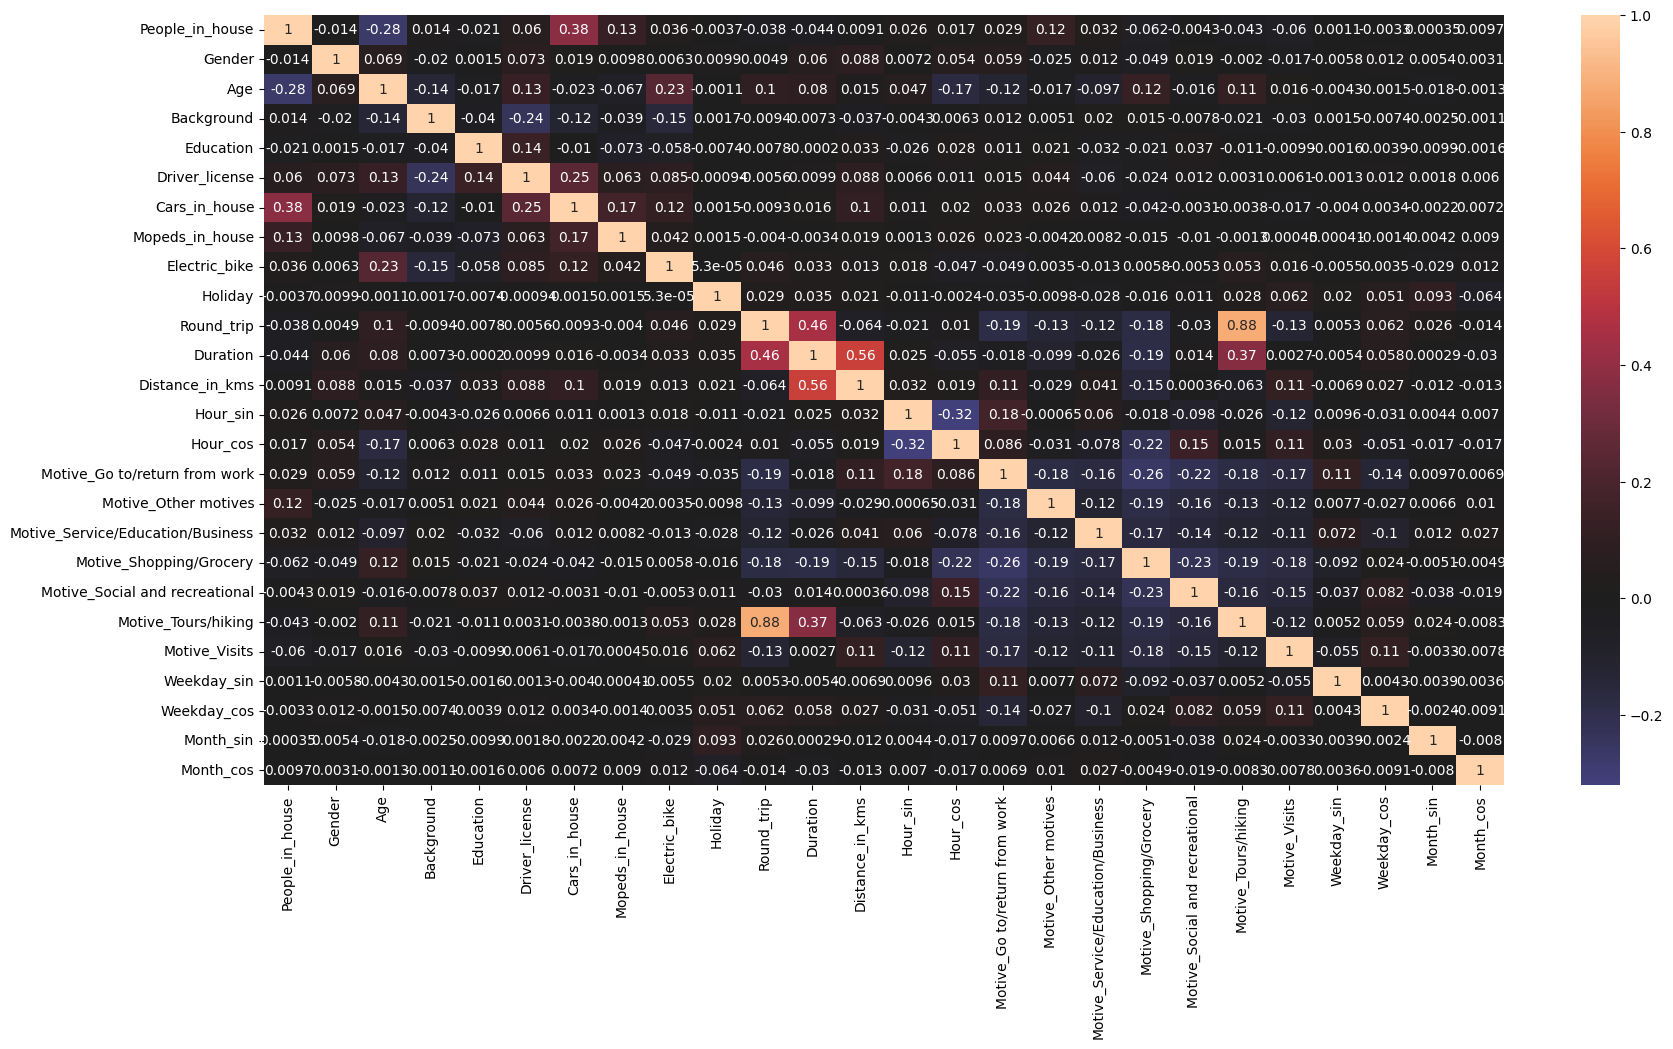

In [6]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [7]:
df = df[(df['Distance_in_kms'] <= 75)]

In [8]:
df = df[(df['Duration'] <= 80)]

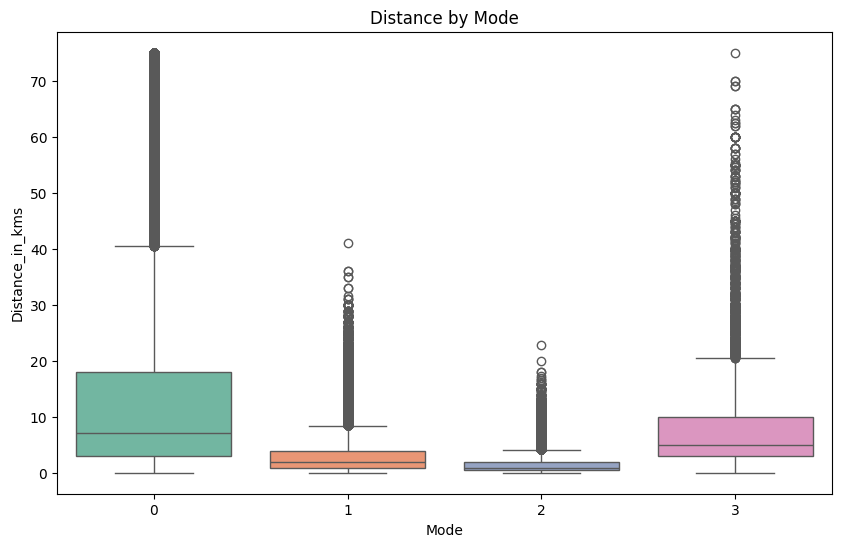

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mode', y='Distance_in_kms', data=df, palette='Set2')
plt.title('Distance by Mode')
plt.show()

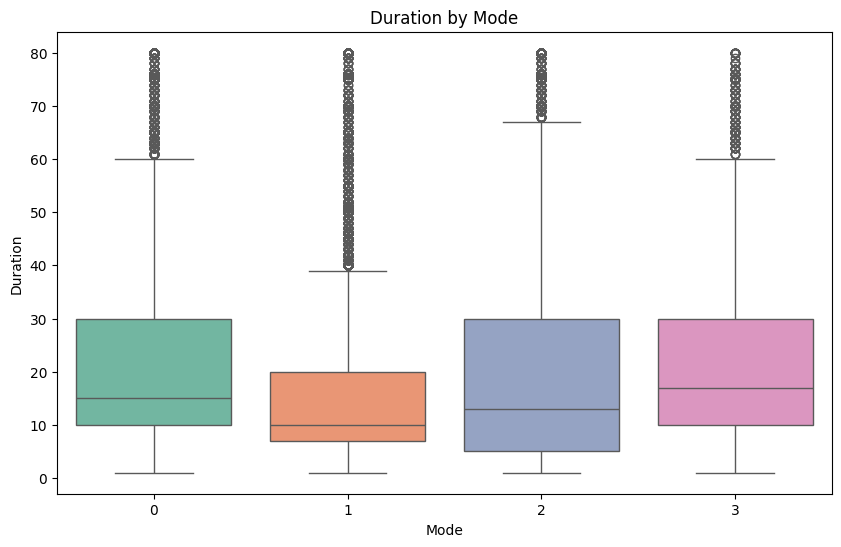

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mode', y='Duration', data=df, palette='Set2')
plt.title('Duration by Mode')
plt.show()

In [23]:
df.describe()

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Holiday,...,Motive_Other motives,Motive_Service/Education/Business,Motive_Shopping/Grocery,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Weekday_sin,Weekday_cos,Month_sin,Month_cos
count,629498.000000,629498.000000,629498.000000,629498.000000,629498.000000,629498.000000,629498.000000,629498.000000,629498.000000,629498.000000,...,629498.000000,629498.000000,629498.000000,629498.000000,629498.000000,629498.000000,6.294980e+05,629498.000000,6.294980e+05,6.294980e+05
mean,2.628153,0.476624,47.277195,0.199194,3.059519,0.872703,1.346209,0.200355,0.299748,0.015479,...,0.119591,0.097022,0.222658,0.159888,0.098146,0.100227,-1.261661e-02,-0.054457,-2.563388e-02,2.013978e-02
std,1.298204,0.499454,17.701583,0.399394,1.000599,0.333305,0.985495,0.543952,0.458148,0.123448,...,0.324482,0.295988,0.416031,0.366502,0.297513,0.300303,7.249073e-01,0.686576,7.088980e-01,7.045584e-01
min,1.000000,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.749279e-01,-0.900969,-1.000000e+00,-1.000000e+00
25%,2.000000,0.000000,32.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.818315e-01,-0.900969,-8.660254e-01,-5.000000e-01
50%,2.000000,0.000000,47.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.449294e-16,-0.222521,-2.449294e-16,6.123234e-17
75%,4.000000,1.000000,61.000000,0.000000,4.000000,1.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.818315e-01,0.623490,5.000000e-01,8.660254e-01
max,10.000000,1.000000,99.000000,1.000000,4.000000,1.000000,10.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.749279e-01,1.000000,1.000000e+00,1.000000e+00


In [12]:
df.duplicated().sum()

0

In [11]:
drops = ["Mode"]
X = df.drop(drops, axis=1)

In [12]:
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                             Variable       VIF
0                               const  0.000000
1                     People_in_house  1.305560
2                              Gender  1.022053
3                                 Age  1.250208
4                          Background  1.093347
5                           Education  1.036960
6                      Driver_license  1.172424
7                       Cars_in_house  1.301553
8                     Mopeds_in_house  1.048903
9                       Electric_bike  1.098639
10                              Month  1.004095
11                            Weekday  1.084131
12                            Holiday  1.007861
13                         Round_trip  5.830478
14                           Duration  2.499606
15                               Hour  1.098933
16                    Distance_in_kms  2.158780
17      Motive_Go to/return from work       inf
18               Motive_Other motives       inf
19  Motive_Service/Education/Business   

In [13]:
drops = ["Mode", "Motive_Tours/hiking", "Round_trip"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [14]:
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                             Variable        VIF
0                               const  53.566117
1                     People_in_house   1.308803
2                              Gender   1.025466
3                                 Age   1.272055
4                          Background   1.092512
5                           Education   1.036890
6                      Driver_license   1.171124
7                       Cars_in_house   1.299892
8                     Mopeds_in_house   1.048912
9                       Electric_bike   1.097980
10                            Holiday   1.020817
11                           Duration   2.252677
12                    Distance_in_kms   2.029830
13                           Hour_sin   1.190151
14                           Hour_cos   1.275388
15      Motive_Go to/return from work   3.340094
16               Motive_Other motives   2.551493
17  Motive_Service/Education/Business   2.290015
18            Motive_Shopping/Grocery   3.554968
19     Motive_Social

In [15]:
df.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Round_trip', 'Duration', 'Mode', 'Distance_in_kms',
       'Hour_sin', 'Hour_cos', 'Motive_Go to/return from work',
       'Motive_Other motives', 'Motive_Service/Education/Business',
       'Motive_Shopping/Grocery', 'Motive_Social and recreational',
       'Motive_Tours/hiking', 'Motive_Visits', 'Weekday_sin', 'Weekday_cos',
       'Month_sin', 'Month_cos'],
      dtype='object')

Those are the final features that we will use

In [42]:
drops = ["Mode", "Motive_Tours/hiking", "Round_trip"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [43]:
X, y = shuffle(X, y, random_state=42)

In [44]:
X.shape

(629498, 24)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =42, stratify=y)

In [46]:
columns = X.columns

In [47]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [50]:
X_train

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Holiday,...,Motive_Go to/return from work,Motive_Other motives,Motive_Service/Education/Business,Motive_Shopping/Grocery,Motive_Social and recreational,Motive_Visits,Weekday_sin,Weekday_cos,Month_sin,Month_cos
0,0.333333,1.0,0.395062,0.0,1.000000,1.0,0.1,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.722521,5.551115e-17,1.000000,0.500000
1,0.444444,0.0,0.259259,1.0,0.333333,0.0,0.1,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,3.568959e-01,0.750000,0.933013
2,0.111111,0.0,0.160494,1.0,0.333333,1.0,0.2,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.900969,8.019377e-01,0.066987,0.250000
3,0.333333,1.0,0.432099,0.0,0.666667,1.0,0.1,0.166667,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,3.568959e-01,0.000000,0.500000
4,0.333333,0.0,0.037037,0.0,0.333333,1.0,0.3,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,1.000000e+00,0.250000,0.933013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566543,0.333333,1.0,0.222222,0.0,1.000000,1.0,0.3,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.568959e-01,0.750000,0.933013
566544,0.222222,0.0,0.444444,0.0,1.000000,1.0,0.1,0.166667,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,3.568959e-01,0.933013,0.250000
566545,0.111111,0.0,0.555556,1.0,1.000000,1.0,0.1,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.277479,0.000000e+00,0.066987,0.750000
566546,0.111111,1.0,0.641975,0.0,1.000000,1.0,0.1,0.000000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.568959e-01,0.500000,0.000000


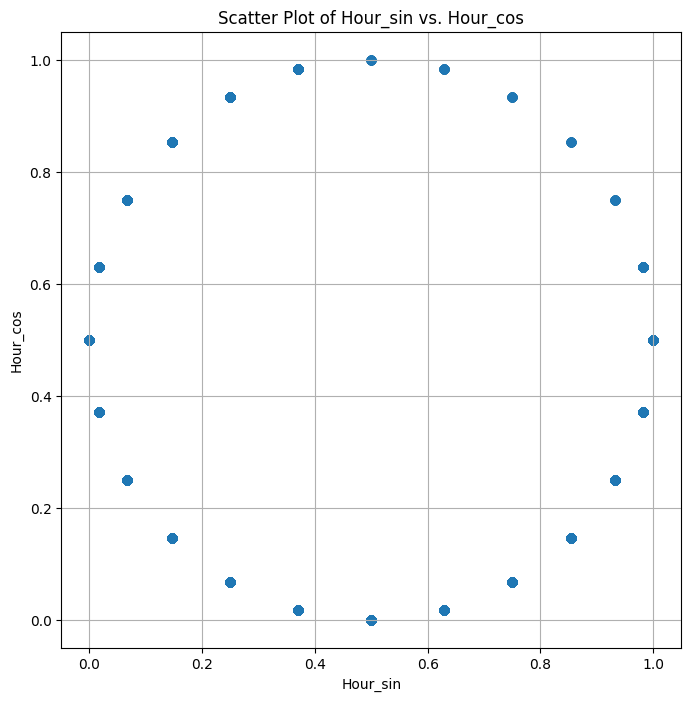

In [51]:
plt.figure(figsize=(8, 8))
plt.scatter(X_test['Hour_sin'], X_test['Hour_cos'])
plt.title('Scatter Plot of Hour_sin vs. Hour_cos')
plt.xlabel('Hour_sin')
plt.ylabel('Hour_cos')
plt.grid(True)
plt.show()

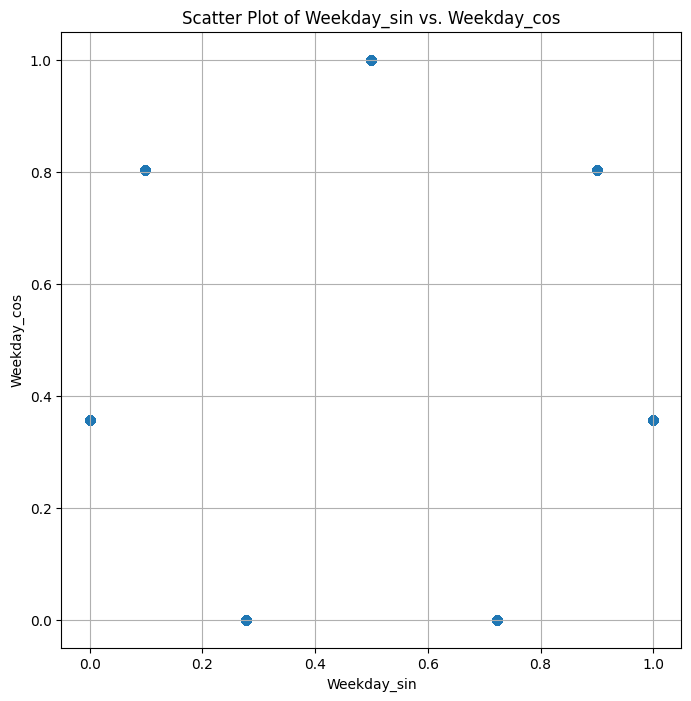

In [52]:
plt.figure(figsize=(8, 8))
plt.scatter(X_test['Weekday_sin'], X_test['Weekday_cos'])
plt.title('Scatter Plot of Weekday_sin vs. Weekday_cos')
plt.xlabel('Weekday_sin')
plt.ylabel('Weekday_cos')
plt.grid(True)
plt.show()

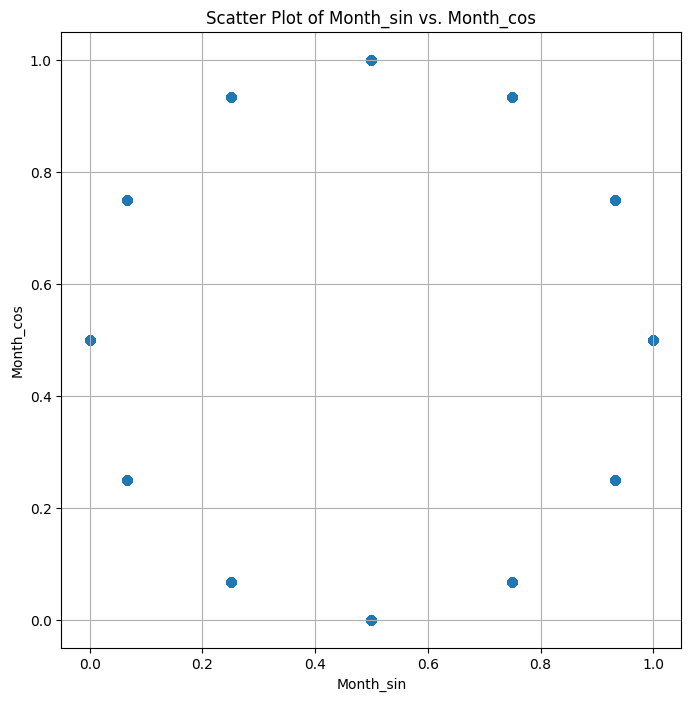

In [53]:
plt.figure(figsize=(8, 8))
plt.scatter(X_test['Month_sin'], X_test['Month_cos'])
plt.title('Scatter Plot of Month_sin vs. Month_cos')
plt.xlabel('Month_sin')
plt.ylabel('Month_cos')
plt.grid(True)
plt.show()

In [54]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    263567
1    143533
2    137607
3     21841
Name: count, dtype: int64

Class counts in y_test:
Mode
0    29285
1    15948
2    15290
3     2427
Name: count, dtype: int64


In [55]:
X_train.shape, X_test.shape

((566548, 24), (62950, 24))

In [56]:
skf = StratifiedKFold(n_splits=10, shuffle=False)

# Dummy Classifier

In [51]:
dummy_classifier = DummyClassifier(strategy="uniform")
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.25      0.32     27722
           1       0.25      0.25      0.25     14975
           2       0.24      0.25      0.24     14656
           3       0.04      0.26      0.07      2404

    accuracy                           0.25     59757
   macro avg       0.25      0.25      0.22     59757
weighted avg       0.34      0.25      0.27     59757



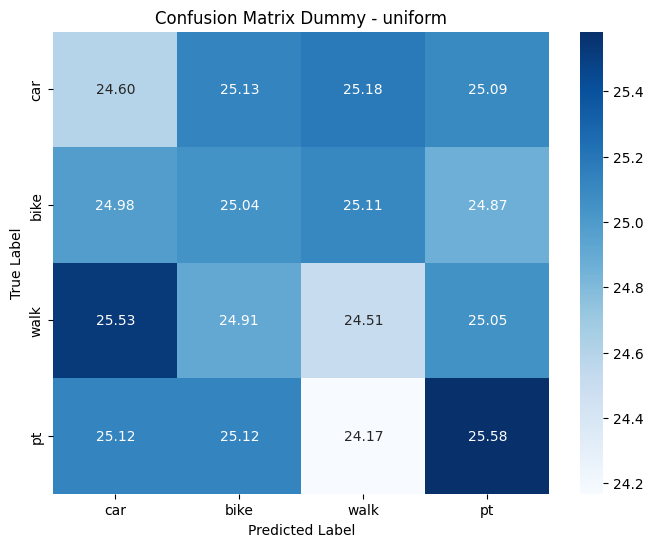

In [52]:
class_labels = ["car", "bike", "walk", 'pt']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Dummy - uniform')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
class_labels_mapping = {
    0: 'car',
    1: "bike",
    2: 'walk',
    3: 'pt'
}

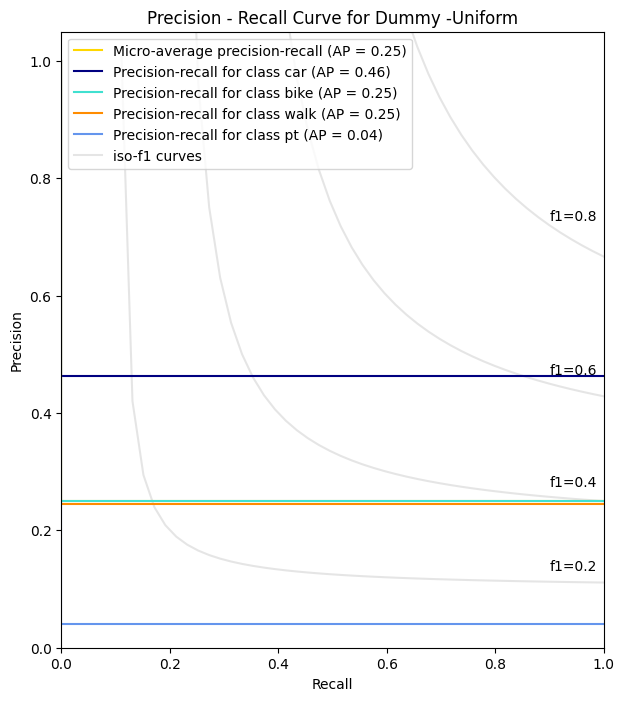

In [54]:
class_probabilities_log = dummy_classifier.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=dummy_classifier.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(dummy_classifier.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Dummy -Uniform")

plt.show()

In [55]:
dummy_classifier = DummyClassifier(strategy="stratified")
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.34
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.46      0.46     27722
           1       0.25      0.25      0.25     14975
           2       0.24      0.24      0.24     14656
           3       0.04      0.04      0.04      2404

    accuracy                           0.34     59757
   macro avg       0.25      0.25      0.25     59757
weighted avg       0.34      0.34      0.34     59757



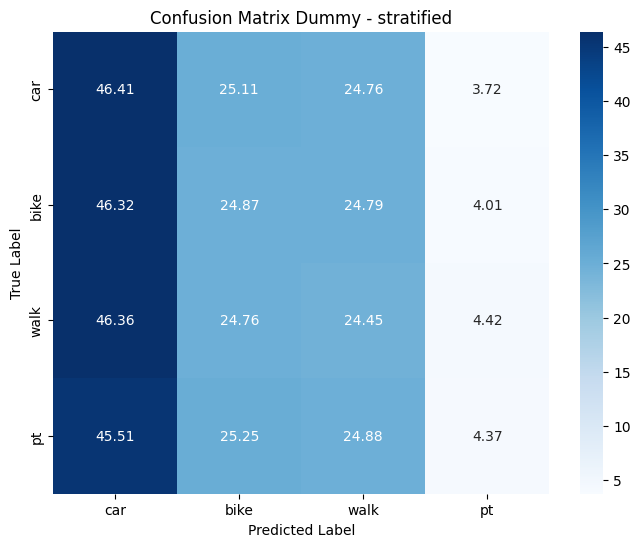

In [56]:
class_labels = ["car", "bike", "walk", 'pt']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Dummy - stratified')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

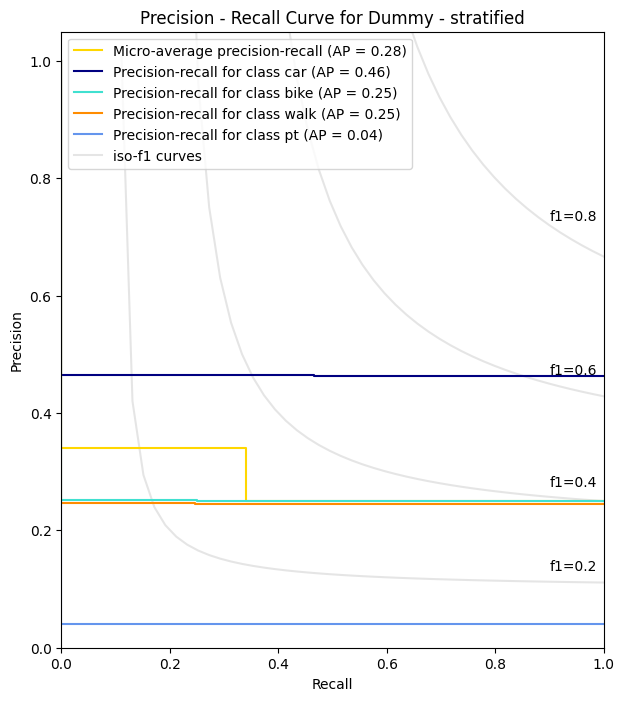

In [57]:
class_probabilities_log = dummy_classifier.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=dummy_classifier.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(dummy_classifier.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Dummy - stratified")

plt.show()

In [79]:
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.46
Classification Report:
               precision    recall  f1-score   support

           0       0.46      1.00      0.63     27722
           1       0.00      0.00      0.00     14975
           2       0.00      0.00      0.00     14656
           3       0.00      0.00      0.00      2404

    accuracy                           0.46     59757
   macro avg       0.12      0.25      0.16     59757
weighted avg       0.22      0.46      0.29     59757



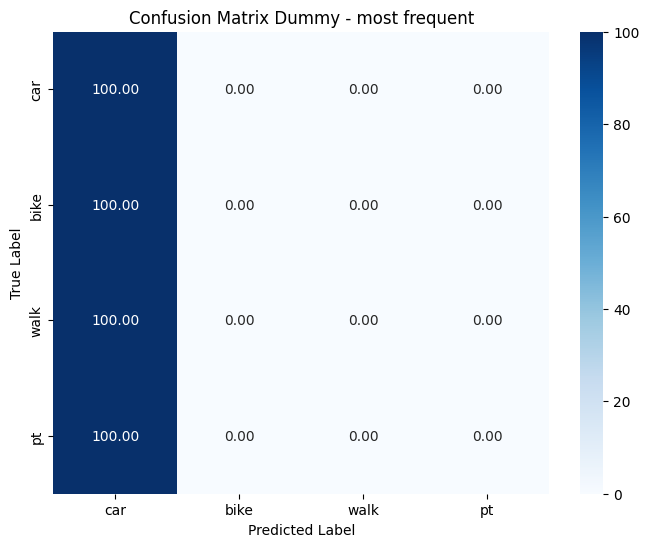

In [80]:
class_labels = ["car", "bike", "walk", 'pt']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Dummy - most frequent')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

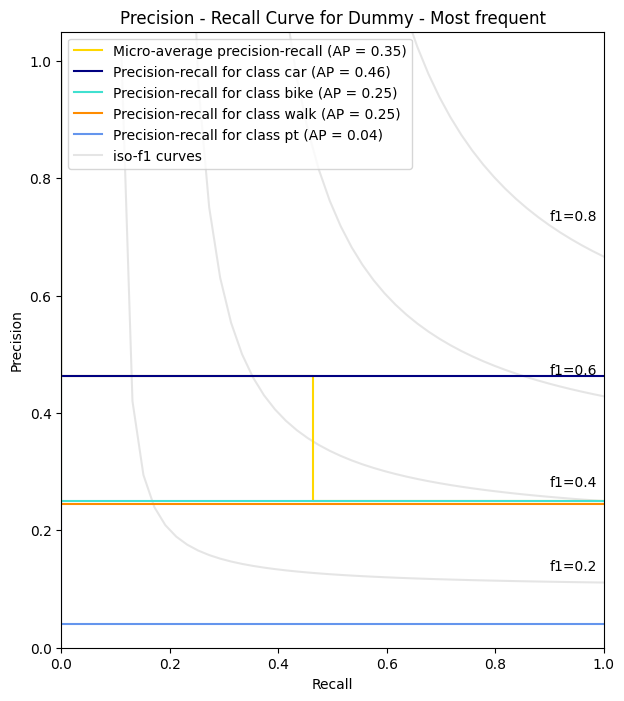

In [81]:
class_probabilities_log = dummy_classifier.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=dummy_classifier.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(dummy_classifier.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Dummy - Most frequent")

plt.show()

# Logistic Regression

In [57]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ('classifier', LogisticRegression(multi_class='ovr'))
])

In [58]:
param_grid = {'classifier__solver' : ['liblinear', 'lbfgs'],
              'classifier__max_iter': [400]}
grid_search_log = GridSearchCV(pipeline, param_grid, cv=skf, scoring='f1_macro')
grid_search_log.fit(X_train, y_train)
log_params = grid_search_log.best_params_
print(log_params)

{'classifier__max_iter': 400, 'classifier__solver': 'lbfgs'}


In [59]:
score = grid_search_log.best_score_
score

0.5645021770919687

In [60]:
logreg_model = grid_search_log.best_estimator_
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78     29285
           1       0.52      0.48      0.50     15948
           2       0.74      0.73      0.73     15290
           3       0.17      0.64      0.26      2427

    accuracy                           0.65     62950
   macro avg       0.57      0.64      0.57     62950
weighted avg       0.72      0.65      0.68     62950



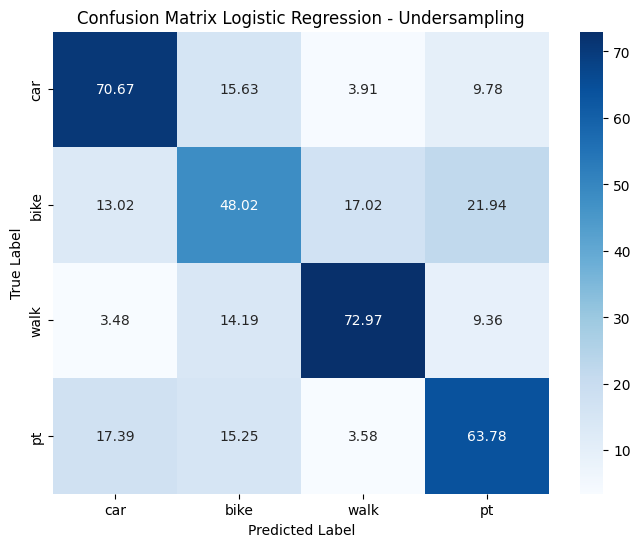

In [61]:
class_labels = ["car", "bike", "walk", 'pt']
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression - Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [62]:
class_labels_mapping = {
    0: 'car',
    1: "bike",
    2: 'walk',
    3: 'pt'
}

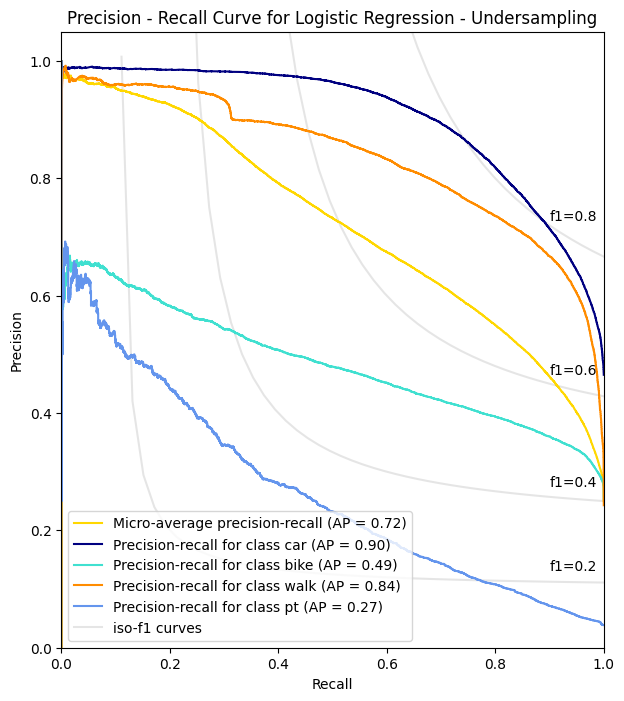

In [63]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Logistic Regression - Undersampling")

plt.show()

# Decision Tree

In [68]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [69]:
param_grid = {
    'classifier__max_depth': list(range(2, 15)),
}

In [70]:
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring="f1_macro", n_jobs=-1)

In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14]},
             scoring='f1_macro')

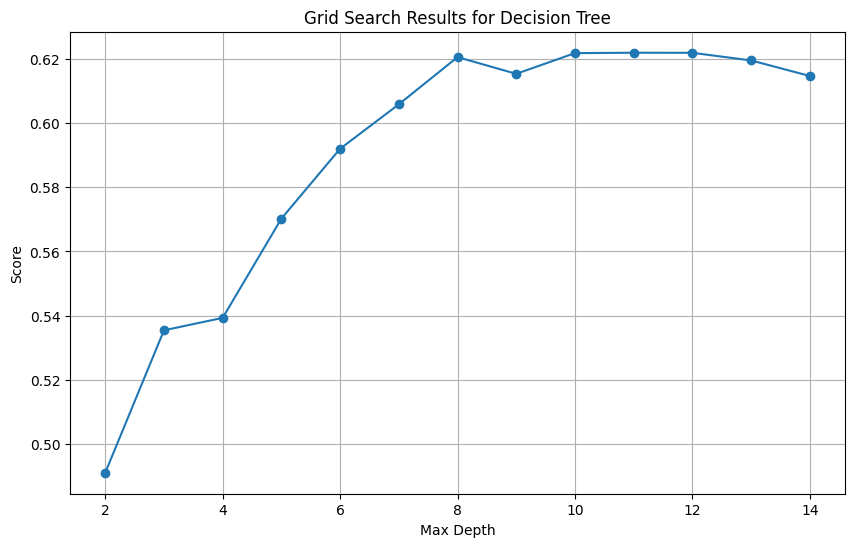

In [72]:
results = grid_search.cv_results_
max_depth_values = results['param_classifier__max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [73]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_f_score = grid_search.best_score_

In [74]:
best_params

{'classifier__max_depth': 11}

In [75]:
best_f_score

0.6218040429154141

In [76]:
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.93      0.66      0.77     29285
           1       0.54      0.66      0.59     15948
           2       0.80      0.81      0.81     15290
           3       0.21      0.64      0.32      2427

    accuracy                           0.70     62950
   macro avg       0.62      0.69      0.62     62950
weighted avg       0.77      0.70      0.72     62950



In [77]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Duration', 'Distance_in_kms', 'Hour_sin', 'Hour_cos',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Education/Business', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Weekday_sin',
       'Weekday_cos', 'Month_sin', 'Month_cos'],
      dtype='object')

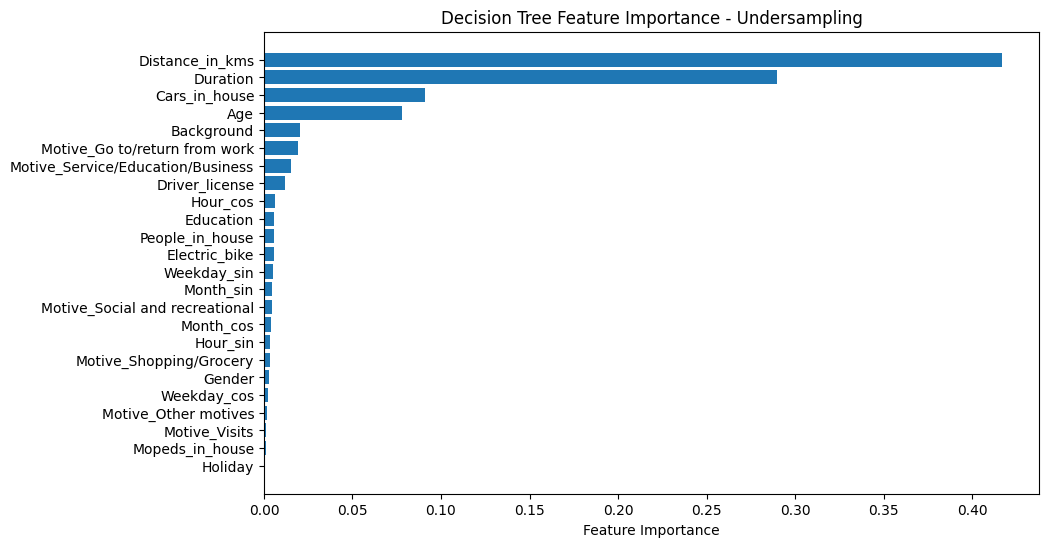

In [78]:
decision_tree_classifier = best_model.named_steps['classifier']

feature_importances = decision_tree_classifier.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Duration', 'Distance_in_kms', 'Hour_sin', 'Hour_cos',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Education/Business', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Weekday_sin',
       'Weekday_cos', 'Month_sin', 'Month_cos']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance - Undersampling")
plt.show()

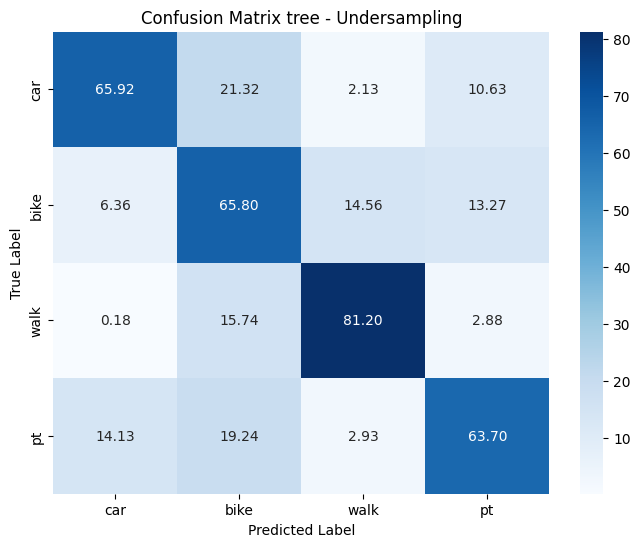

In [80]:
class_labels = ["car", "bike", "walk", 'pt']
conf_matrix_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix tree - Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

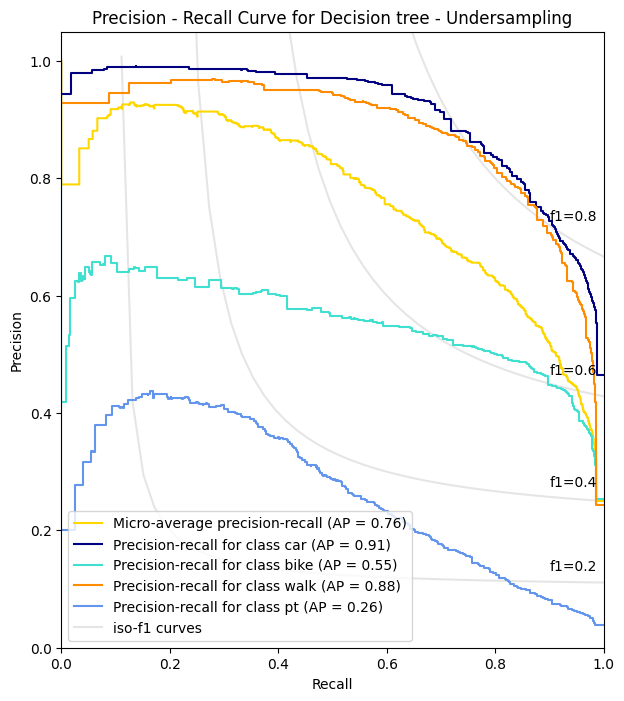

In [81]:
class_probabilities_tree = best_model.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree - Undersampling")

plt.show()

# Random Forest

In [82]:
X.shape

(629498, 24)

In [83]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

In [84]:
param_grid = {
    'classifier__max_features' : list(range(3, 10))
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=skf, scoring='f1_macro')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             param_grid={'classifier__max_features': [3, 4, 5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [85]:
best_params = grid_search_rf.best_params_
print(best_params)

{'classifier__max_features': 8}


In [86]:
best_score = grid_search_rf.best_score_
print(best_score)

0.6634247892729016


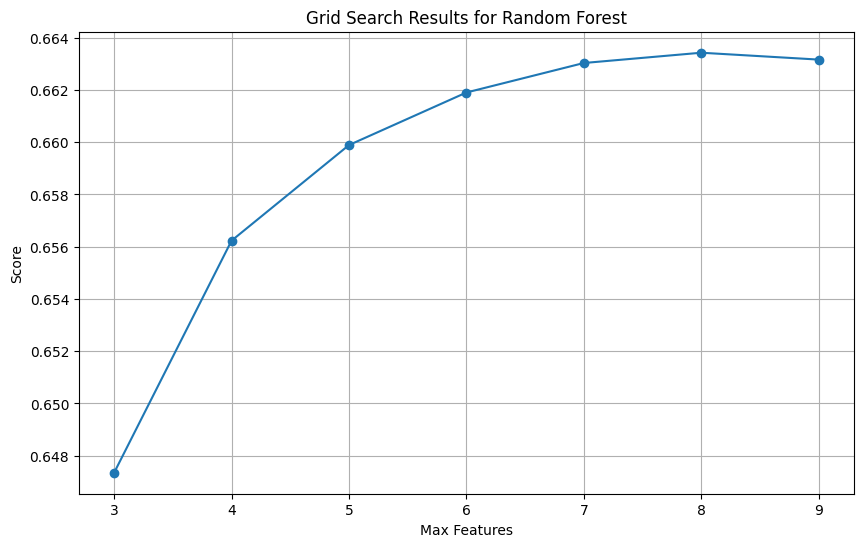

In [87]:
results = grid_search_rf.cv_results_
max_depth_values = results['param_classifier__max_features'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Random Forest')
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [92]:
param_grid = {
    'classifier__n_estimators' : [500, 550, 600],
    'classifier__max_features' : [8],
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=skf, scoring='f1_macro')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             param_grid={'classifier__max_features': [8],
                         'classifier__n_estimators': [500, 550, 600]},
             scoring='f1_macro')

In [93]:
best_params = grid_search_rf.best_params_
print(best_params)

{'classifier__max_features': 8, 'classifier__n_estimators': 550}


In [94]:
best_score = grid_search_rf.best_score_
print(best_score)

0.6654508350903271


In [88]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_train)
tree_report_test = classification_report(y_train, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.95      0.75      0.83    263567
           1       0.66      0.70      0.68    143533
           2       0.85      0.88      0.86    137607
           3       0.35      1.00      0.52     21841

    accuracy                           0.78    566548
   macro avg       0.70      0.83      0.72    566548
weighted avg       0.83      0.78      0.79    566548



In [95]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.93      0.72      0.81     29285
           1       0.60      0.65      0.63     15948
           2       0.82      0.86      0.84     15290
           3       0.26      0.75      0.39      2427

    accuracy                           0.74     62950
   macro avg       0.65      0.75      0.67     62950
weighted avg       0.80      0.74      0.76     62950



In [96]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Duration', 'Distance_in_kms', 'Hour_sin', 'Hour_cos',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Education/Business', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Weekday_sin',
       'Weekday_cos', 'Month_sin', 'Month_cos'],
      dtype='object')

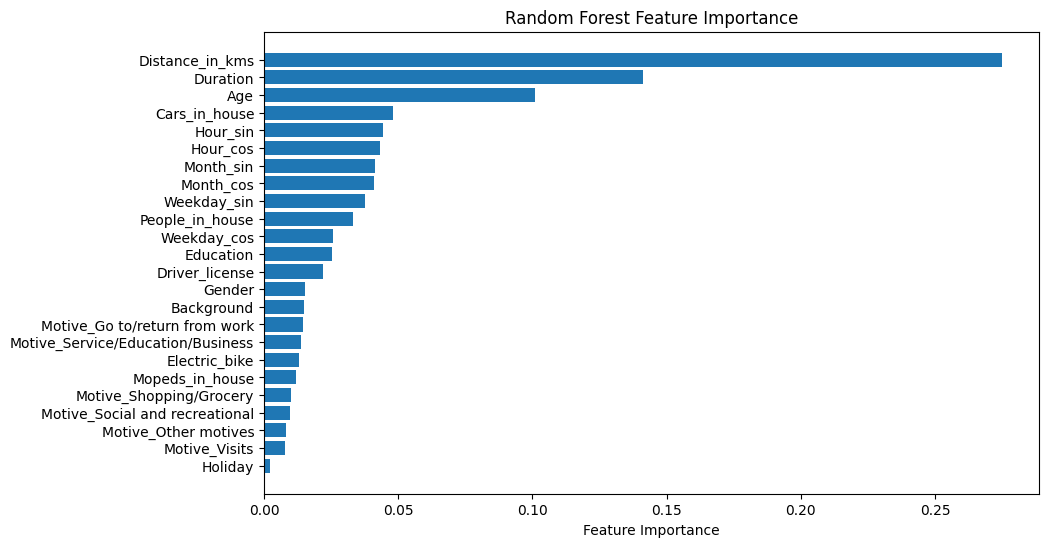

In [97]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Duration', 'Distance_in_kms', 'Hour_sin', 'Hour_cos',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Education/Business', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Weekday_sin',
       'Weekday_cos', 'Month_sin', 'Month_cos']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

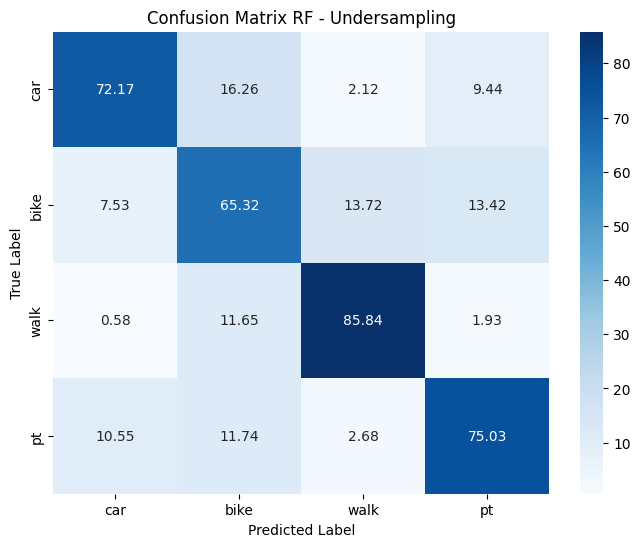

In [98]:
class_labels = ["car", "bike", "walk", 'pt']
conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF - Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

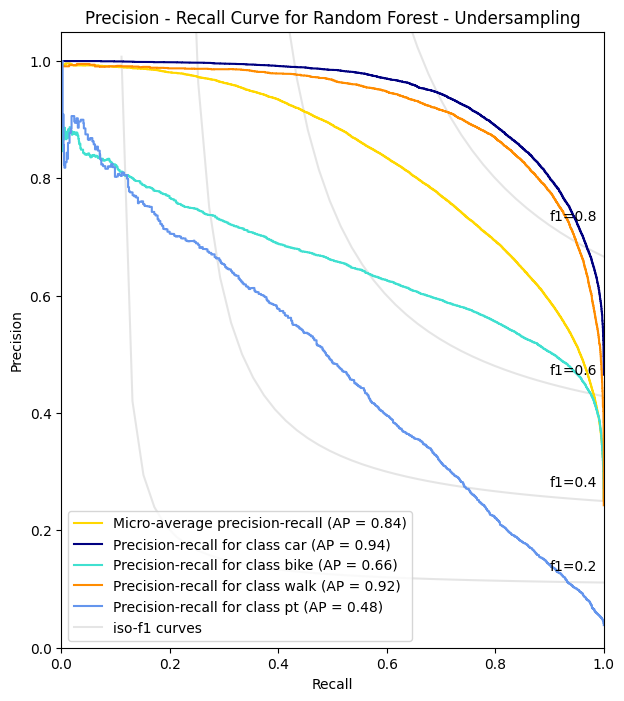

In [99]:
class_probabilities_rf = best_model.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest - Undersampling")

plt.show()

# XGBoost

In [100]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42))
])

In [101]:
param_grid = {
    'classifier__colsample_bytree' : [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=Fa...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, num_class=4,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.2, 0.3, 0.4, 0.5,
                                                          0.6, 0.7, 0.8, 0.9,
                                                          1]},
             scoring='f1_macro')

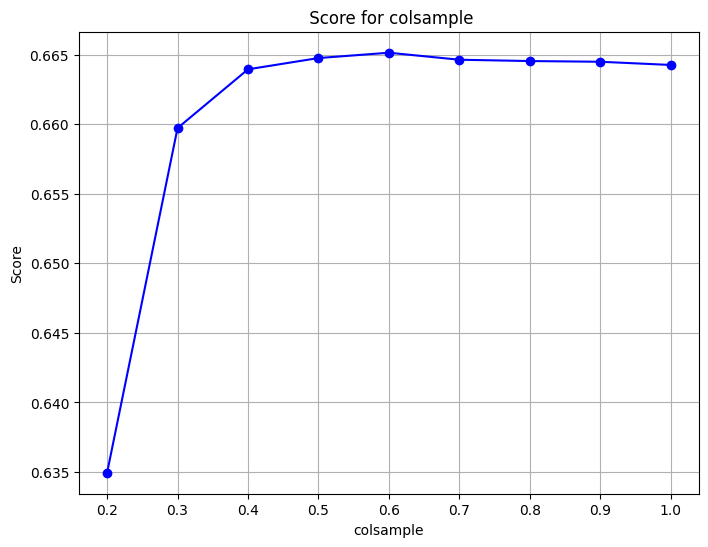

In [102]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__colsample_bytree']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for colsample')
plt.xlabel('colsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [107]:
param_grid = {
    'classifier__subsample' : [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

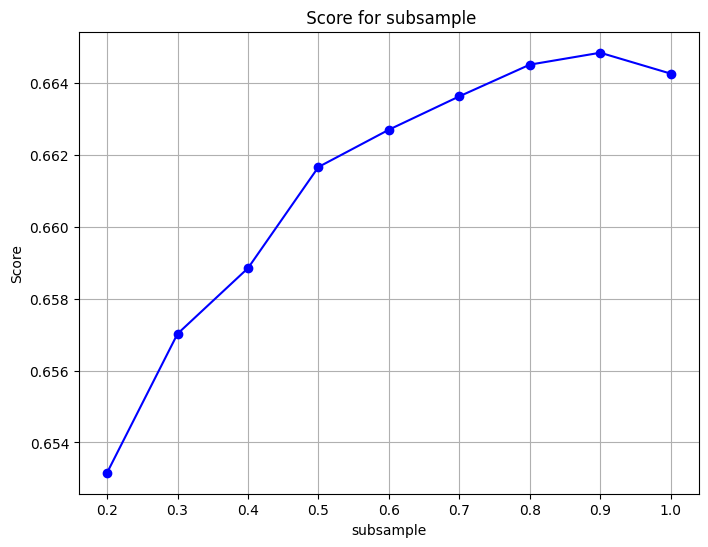

In [108]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__subsample']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for subsample')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [109]:
param_grid = {
    'classifier__learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

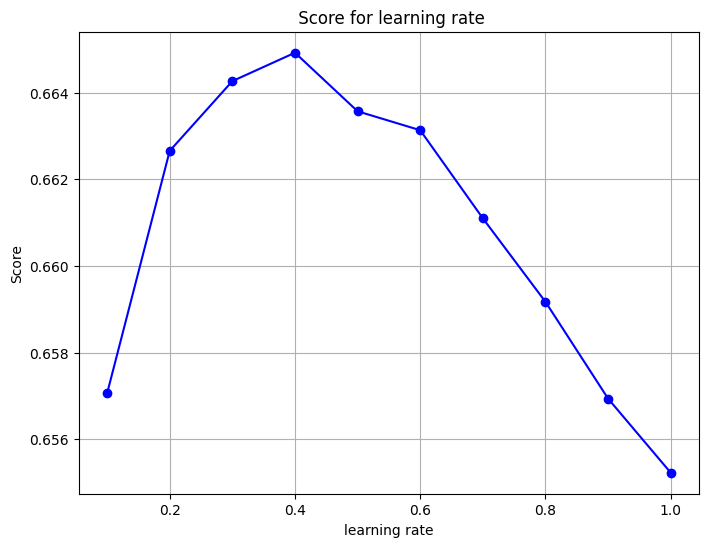

In [110]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__learning_rate']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for learning rate')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.grid(True)
plt.show()

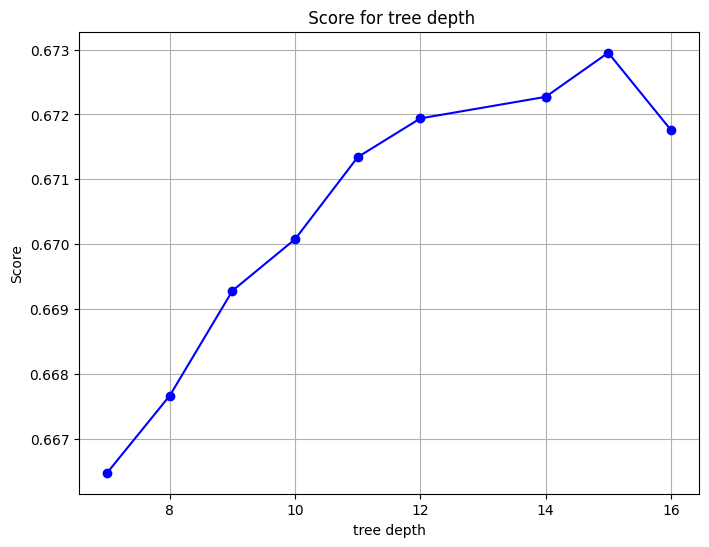

In [111]:
param_grid = {
    'classifier__max_depth' : [7, 8, 9 ,10, 11, 12, 14, 14, 15, 16]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__max_depth']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for tree depth')
plt.xlabel('tree depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [112]:
param_grid = {
    'classifier__learning_rate' : [0.3, 0.4],
    'classifier__subsample' : [0.8, 0.9], 
    'classifier__n_estimators' : [250, 300, 350],
    'classifier__colsample_bytree' : [0.6],
    'classifier__max_depth': [15]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.3, 'classifier__max_depth': 15, 'classifier__n_estimators': 250, 'classifier__subsample': 0.9}


In [113]:
score = grid_search.best_score_
score

0.674039986059986

In [114]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train)
xgbreport = classification_report(y_train, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.94      0.76      0.84    263567
           1       0.67      0.71      0.69    143533
           2       0.85      0.87      0.86    137607
           3       0.37      1.00      0.54     21841

    accuracy                           0.78    566548
   macro avg       0.71      0.84      0.73    566548
weighted avg       0.83      0.78      0.80    566548



In [115]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.92      0.74      0.82     29285
           1       0.62      0.66      0.64     15948
           2       0.82      0.85      0.83     15290
           3       0.29      0.78      0.42      2427

    accuracy                           0.75     62950
   macro avg       0.66      0.76      0.68     62950
weighted avg       0.79      0.75      0.76     62950



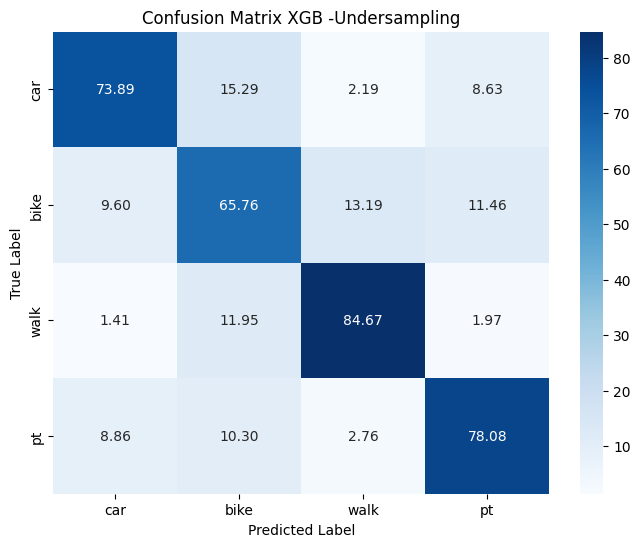

In [116]:
class_labels = ["car", "bike", "walk", 'pt']
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_xgb) / conf_matrix_xgb.sum(axis=1)
conf_matrix_percentages_xgb = (conf_matrix_xgb.T / conf_matrix_xgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_xgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix XGB -Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

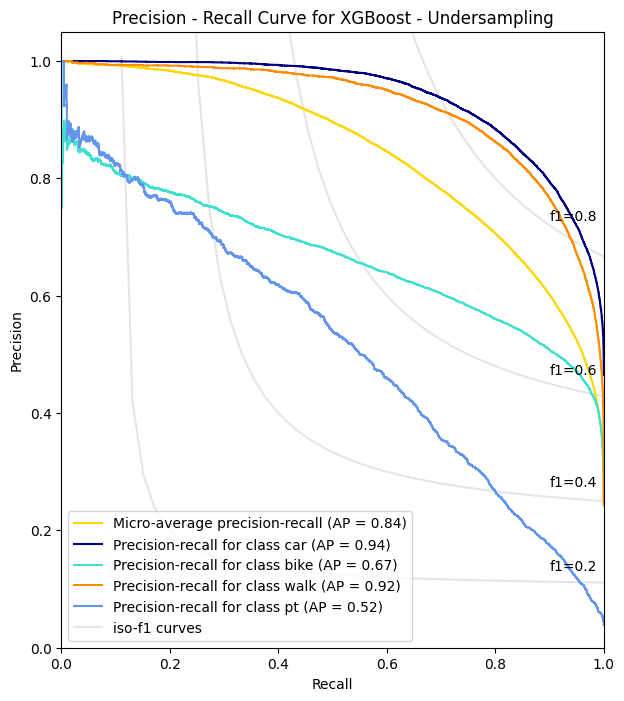

In [117]:
class_probabilities_xgb = best_model.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    average_precision[i] = average_precision_score(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_xgb.ravel(), class_probabilities_xgb.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_xgb, class_probabilities_xgb, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for XGBoost - Undersampling")

plt.show()

In [118]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Duration', 'Distance_in_kms', 'Hour_sin', 'Hour_cos',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Education/Business', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Weekday_sin',
       'Weekday_cos', 'Month_sin', 'Month_cos'],
      dtype='object')

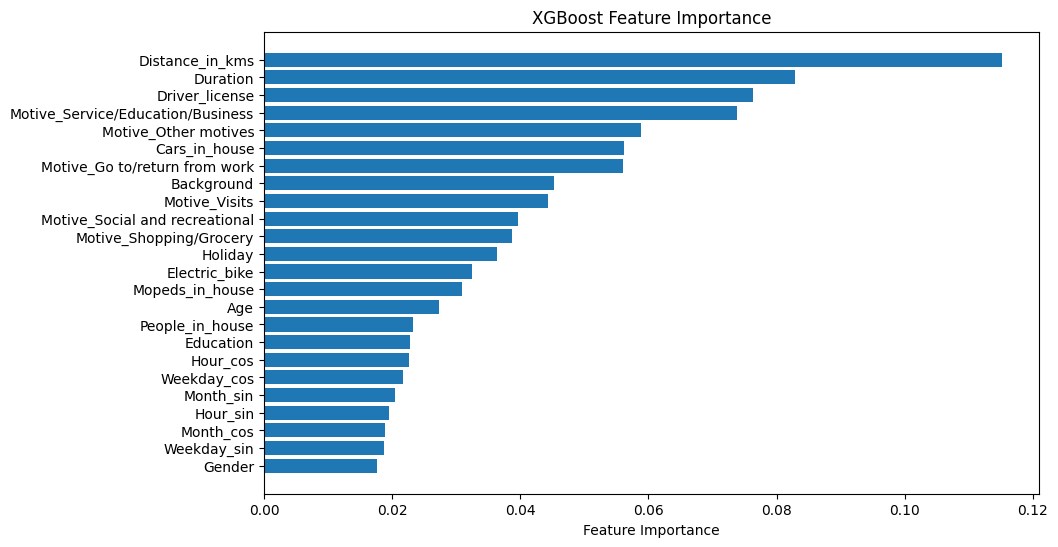

In [119]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Duration', 'Distance_in_kms', 'Hour_sin', 'Hour_cos',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Education/Business', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Weekday_sin',
       'Weekday_cos', 'Month_sin', 'Month_cos']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()